In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import MaxPool2D,Flatten
from keras.layers import Dropout

In [7]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
labels = ['ariplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

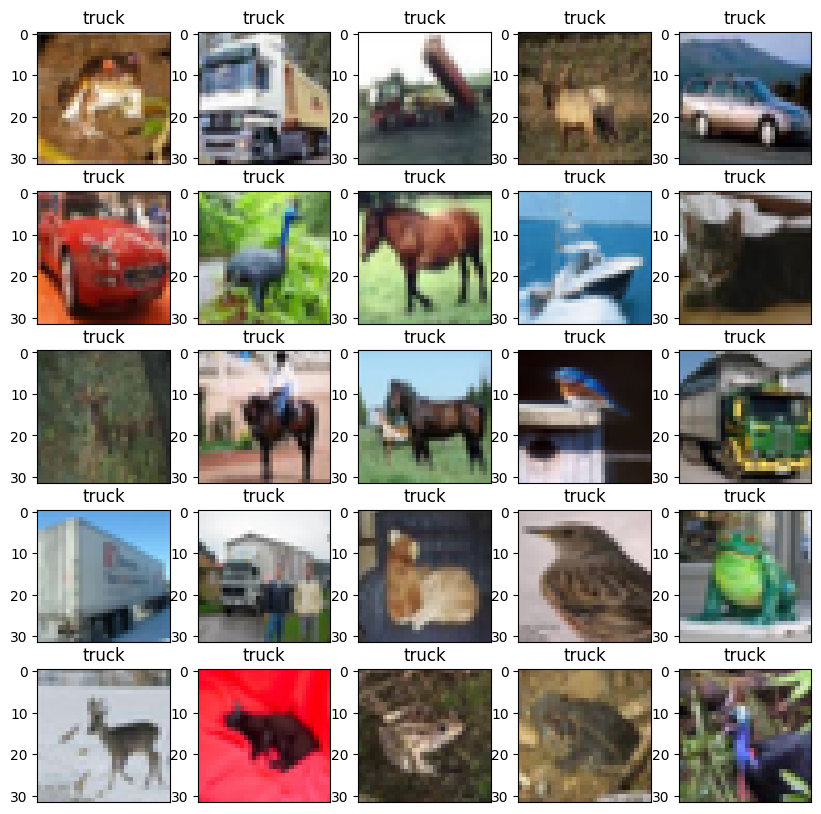

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.title(labels[y_train[1][0]])
  plt.imshow(x_train[i])

In [14]:
x_train = x_train/ 255
x_test = x_test / 255

In [15]:
from keras.utils import to_categorical

In [16]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [17]:
y_train_new.shape

(50000, 10)

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, input_shape=(32,32,3), kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


# model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [21]:
from keras.utils import plot_model

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.fit(x_train, y_train_new, epochs=10, batch_size=20)

Epoch 1/10
2500/2500 [==============================] - 105s 41ms/step - loss: 1.3890 - accuracy: 0.5001
Epoch 2/10
2500/2500 [==============================] - 101s 40ms/step - loss: 1.0127 - accuracy: 0.6445
Epoch 3/10
2500/2500 [==============================] - 101s 40ms/step - loss: 0.8480 - accuracy: 0.7030
Epoch 4/10
2500/2500 [==============================] - 97s 39ms/step - loss: 0.7148 - accuracy: 0.7506
Epoch 5/10
2500/2500 [==============================] - 97s 39ms/step - loss: 0.6012 - accuracy: 0.7887
Epoch 6/10
2500/2500 [==============================] - 98s 39ms/step - loss: 0.4934 - accuracy: 0.8264
Epoch 7/10
2500/2500 [==============================] - 101s 40ms/step - loss: 0.4025 - accuracy: 0.8584
Epoch 8/10
2500/2500 [==============================] - 96s 38ms/step - loss: 0.3286 - accuracy: 0.8846
Epoch 9/10
2500/2500 [==============================] - 101s 40ms/step - loss: 0.2717 - accuracy: 0.9042
Epoch 10/10
2500/2500 [==============================] - 99

In [24]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 [==============================] - 31s 3ms/step - loss: 1.2915 - accuracy: 0.7078


[1.2914848327636719, 0.7077999711036682]

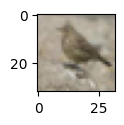

In [29]:
plt.figure(figsize=(1,4))
plt.imshow(x_train[120])


In [27]:
new = x_train[120]
new = new.reshape(1,32,32,3)

labels[np.argmax(model.predict(new))]

1/1 [==============================] - 0s 22ms/step


'bird'